In [1]:
import os
import torch
import numpy as np
import torchvision
from torch import nn
from dotenv import load_dotenv
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

In [2]:
load_dotenv()

dataset_path = os.environ['DATASET_PATH']

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 128

trainset = torchvision.datasets.CIFAR10(root=dataset_path, train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root=dataset_path, train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100.0%


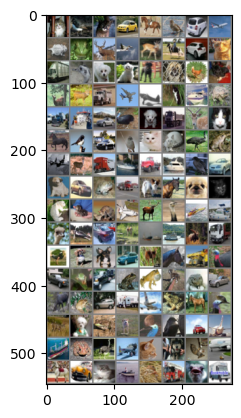

cat   bird  cat   car   horse bird  car   plane frog  frog  deer  plane deer  horse car   cat   truck bird  dog   dog   dog   dog   bird  dog   deer  deer  truck plane plane cat   ship  frog  truck ship  car   bird  dog   truck deer  cat   horse bird  car   bird  cat   cat   bird  frog  plane deer  truck ship  truck ship  bird  car   dog   car   frog  truck dog   horse dog   cat   dog   cat   cat   plane deer  bird  ship  ship  bird  plane car   deer  ship  ship  deer  truck bird  dog   dog   car   deer  horse truck bird  car   frog  truck frog  frog  dog   frog  car   deer  frog  car   truck plane frog  horse bird  deer  dog   frog  dog   bird  ship  car   plane ship  frog  bird  plane cat   dog   cat   plane horse car   cat   ship  frog  truck bird  truck


In [3]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [10]:
from vit import ViT

network = ViT(
    image_size=32,
    patch_size=8,
    num_classes=10,
    dim=64,
    depth=2,
    heads=4,
    mlp_dim=64,
    dropout=0.0,
    emb_dropout=0.0
)

criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(network.parameters(), lr=1e-3, weight_decay=5e-5)

In [15]:
from train import train_network

train_network(
    network,
    trainloader,
    optimizer,
    criterion,
    epochs=1,
    print_interval=10,
    )

[1,    10] loss: 1.608, accuracy: 43.0%
[1,    20] loss: 1.579, accuracy: 42.8%
[1,    30] loss: 1.605, accuracy: 42.1%
[1,    40] loss: 1.619, accuracy: 42.3%
[1,    50] loss: 1.588, accuracy: 42.5%
[1,    60] loss: 1.618, accuracy: 42.4%
[1,    70] loss: 1.624, accuracy: 42.3%
[1,    80] loss: 1.595, accuracy: 42.4%
[1,    90] loss: 1.601, accuracy: 42.2%
[1,   100] loss: 1.587, accuracy: 42.3%
[1,   110] loss: 1.619, accuracy: 42.2%
[1,   120] loss: 1.578, accuracy: 42.3%
[1,   130] loss: 1.547, accuracy: 42.3%
[1,   140] loss: 1.568, accuracy: 42.4%
[1,   150] loss: 1.602, accuracy: 42.4%
[1,   160] loss: 1.529, accuracy: 42.6%
[1,   170] loss: 1.527, accuracy: 42.8%
[1,   180] loss: 1.483, accuracy: 42.9%
[1,   190] loss: 1.545, accuracy: 43.0%
[1,   200] loss: 1.541, accuracy: 43.1%
[1,   210] loss: 1.554, accuracy: 43.2%
[1,   220] loss: 1.520, accuracy: 43.2%
[1,   230] loss: 1.568, accuracy: 43.3%
[1,   240] loss: 1.527, accuracy: 43.4%
[1,   250] loss: 1.546, accuracy: 43.5%
